In [26]:
!pip install tensorflow

In [21]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [2]:
#importing basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## Divide datset into dependent and independent features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [9]:
##Feature enginering
geography=pd.get_dummies(X['Geography'],drop_first=True).astype(int) # doing one hot encodings
gender=pd.get_dummies(X['Gender'],drop_first=True).astype(int)

In [10]:
##concat these variavles with dataframe

X=X.drop(['Geography','Gender'],axis=1) #dropping columns

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
X=pd.concat([X,geography,gender],axis=1)

In [13]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [14]:
#Splitting training set and Test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
#feature scaling

from sklearn.preprocessing import StandardScaler # Based on Z-SCORE
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [18]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [20]:
X_train.shape

(8000, 11)

In [22]:
##Part 2  Now lets create the ANN

from tensorflow.keras.models import Sequential #for doing forward and backward propa.
from tensorflow.keras.layers import Dense #for initizlinzinf layers
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout  #for removing nodes in layer

In [89]:
#lets initialize the ANN
classifier=Sequential()

In [90]:
##ADD input layer
classifier.add(Dense(units=11,activation='relu'))

In [91]:
##adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [92]:
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

In [93]:
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [94]:
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])#by default adam has learnig rate 0.01

In [95]:
##Early stopping  used for stopping training if accuracy is not increaing significantly
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [96]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4967 - loss: 0.8356 - val_accuracy: 0.7955 - val_loss: 0.4962
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7924 - loss: 0.5163 - val_accuracy: 0.7952 - val_loss: 0.4571
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8028 - loss: 0.4721 - val_accuracy: 0.8107 - val_loss: 0.4316
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8060 - loss: 0.4526 - val_accuracy: 0.8209 - val_loss: 0.4189
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8172 - loss: 0.4376 - val_accuracy: 0.8251 - val_loss: 0.4036
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8235 - loss: 0.4152 - val_accuracy: 0.8368 - val_loss: 0.3895
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8256 - loss: 0.3972 - val_accuracy: 0.8376 - val_loss: 0.3834
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8408 - loss: 0.3754 - 

In [97]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

<ipython-input-98-064478068751>:7: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(['train'],['test'],loc='upper left')


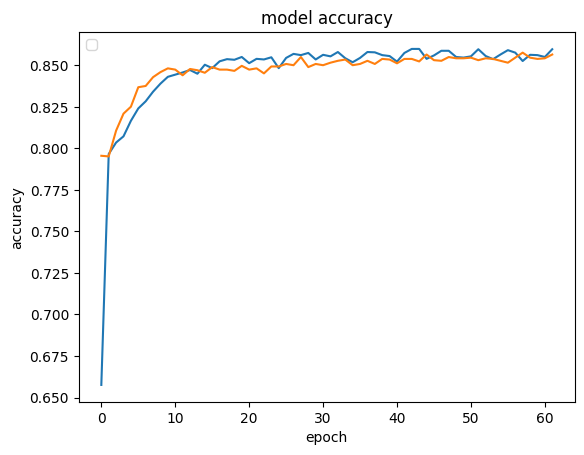

In [98]:
#summarize the accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],['test'],loc='upper left')
plt.show()

<ipython-input-99-001d51dd232b>:7: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(['train'],['test'],loc='upper left')


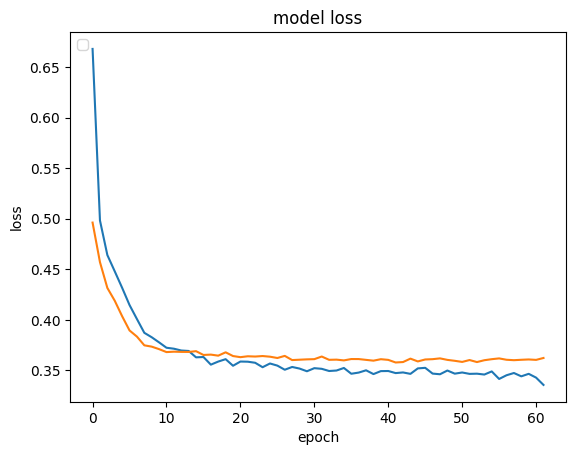

In [99]:
#summarize the hisory for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],['test'],loc='upper left')
plt.show()

In [100]:
#part 3 - making the predictions and avaluting the model
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [101]:
#make the confusin matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1544,   51],
       [ 229,  176]])

In [102]:
##calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.86

In [103]:
##get the weights
classifier.get_weights()

[array([[ 1.73904747e-01,  1.83730364e-01, -1.52856261e-01,
         -1.55742332e-01,  1.35113984e-01, -8.43729265e-03,
          1.52754933e-01, -4.37063575e-02,  1.40105307e-01,
          3.31799760e-02,  5.62445223e-02],
        [ 2.09322453e-01,  2.30218068e-01,  1.70410529e-01,
          1.11897871e-01, -9.33817625e-01, -4.95000891e-02,
          8.53957012e-02,  5.52158594e-01,  4.62758020e-02,
          2.09618211e-02, -7.42704332e-01],
        [-3.20258200e-01,  4.57448512e-02,  8.26203525e-02,
         -4.82826345e-02,  3.09222788e-02,  3.46731603e-01,
         -5.93071580e-02,  1.00269847e-01,  6.76610544e-02,
          7.16418475e-02,  9.62051656e-03],
        [ 6.36866391e-01,  5.84261841e-04, -8.57229650e-01,
          1.62137240e-01,  1.68192834e-01, -6.99831843e-01,
         -4.56419617e-01, -1.57875448e-01, -1.58668861e-01,
          6.05299652e-01, -1.49100080e-01],
        [-5.26943684e-01,  7.55235434e-01, -1.36887610e+00,
          9.56019700e-01, -1.29099473e-01,  